#Preparation

In [1]:
!pip install ipython-autotime
%load_ext autotime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.9 MB/s eta 0:00:00
time: 352 µs (started: 2025-05-29 06:41:11 +00:00)


In [2]:
# Import libraries that I would need later

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split


import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

time: 11.9 s (started: 2025-05-29 06:41:11 +00:00)


In [3]:
# Process the files with data to put them all into one dataframe

one_data = pd.read_csv('Youtube01-Psy.csv')
two_data = pd.read_csv('Youtube02-KatyPerry.csv')
three_data = pd.read_csv('Youtube03-LMFAO.csv')
four_data = pd.read_csv('Youtube04-Eminem.csv')
five_data = pd.read_csv('Youtube05-Shakira.csv')

data = pd.concat([one_data, two_data, three_data, four_data, five_data], axis=0, ignore_index=True)


time: 67.9 ms (started: 2025-05-29 06:41:23 +00:00)


In [4]:
data

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...,...
1951,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0
1952,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
1953,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
1954,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0


time: 80.4 ms (started: 2025-05-29 06:41:23 +00:00)


#Preprocessing

In [5]:
# Shuffle the data and split it into train and test using sklearn method

X = data['CONTENT']
y = data['CLASS']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

time: 10.3 ms (started: 2025-05-29 06:41:23 +00:00)


In [44]:
# Reshape comments using vectorizer

corpus = X

vectorizer = TfidfVectorizer(stop_words=None).fit(corpus)

v_train=vectorizer.transform(X_train)
print(v_train.shape)
print(v_train.toarray())

v_test=vectorizer.transform(X_test)
print(v_test.shape)
print(v_test.toarray())


(1564, 4454)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(392, 4454)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
time: 120 ms (started: 2025-05-29 07:38:24 +00:00)


#Logistic Regression

In [7]:
# Using Logistic Regression, determine the best lambda value

clf = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(5, -6, -1))), cv=5, penalty='l2', scoring='roc_auc',
                           solver='newton-cg', max_iter=30000, random_state=0).fit(v_train, y_train)

print('lambda=1/Cs, so the auc_roc score for log_10(lambda) value from [-5,-4,...,5]=\n',clf.scores_[1].mean(axis=0))
print('The max auc_roc:', clf.scores_[1].mean(axis=0).max())

i=np.where(clf.scores_[1].mean(axis=0)==clf.scores_[1].mean(axis=0).max())
i=int(i[0])
Cs=list(np.power(10.0, np.arange(5, -6, -1)))
Cs_select=Cs[i]
print('The max auc_roc when lambda=',1/Cs[i])

lambda=1/Cs, so the auc_roc score for log_10(lambda) value from [-5,-4,...,5]=
 [0.98914971 0.98914971 0.98914971 0.98914976 0.9885369  0.98480955
 0.97795174 0.96870643 0.96573103 0.96542033 0.96537945]
The max auc_roc: 0.9891497634547312
The max auc_roc when lambda= 0.01
time: 848 ms (started: 2025-05-29 06:41:24 +00:00)


<ipython-input-7-afa849f0cab4>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  i=int(i[0])


Confusion Table for train:


,Predicted Positive,Predicted Negative
Actual Positive,775,0
Actual Negative,0,789


 
 
 
 
Confusion table for test:


,Predicted Positive,Predicted Negative
Actual Positive,172,4
Actual Negative,16,200


 
 
 
 
Metrics for Logistic Regression:


,Accuracy,Precision,Recall,F1,AUC
Train,1.000000,1.000000,1.000000,1.000000,1.000000
Test,0.948980,0.980392,0.925926,0.952381,0.951599


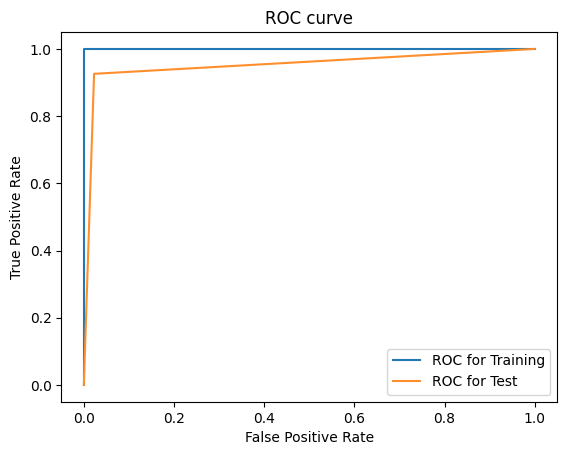

time: 834 ms (started: 2025-05-29 06:41:24 +00:00)


In [8]:
# Train Logistic Regression using the optimal lambda

precisions = []
F1 = []
train_error = []
recall = []
AUC = []
accuracy = []

clf = LogisticRegression(random_state=0, C=Cs_select, penalty='l2', max_iter=30000).fit(v_train, y_train)
y_train_pred=clf.predict(v_train)
y_pred = clf.predict(v_test)

# Confusion Matrix
cm0 = confusion_matrix(y_train, y_train_pred)
cm = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy.append(accuracy_score(y_train, y_train_pred))
accuracy.append(accuracy_score(y_test, y_pred))

# Precision
precisions.append(precision_score(y_train, y_train_pred))
precisions.append(precision_score(y_test, y_pred))

# Recall
recall.append(recall_score(y_train, y_train_pred))
recall.append(recall_score(y_test, y_pred))

#F1 score
F1.append(f1_score(y_train, y_train_pred))
F1.append(f1_score(y_test, y_pred))

# AUC
AUC.append(roc_auc_score(y_train, y_train_pred))
AUC.append(roc_auc_score(y_test, y_pred))

 # ROC
fpr0, tpr0, thresholds0 = roc_curve(y_train, y_train_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr0, tpr0, '#2178b5', label='ROC for Training')
plt.plot(fpr, tpr, '#ff8f2c', label='ROC for Test')
plt.legend()

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print('Confusion Table for train:')
headings = ['Predicted Positive', 'Predicted Negative']
names = ['Actual Positive', 'Actual Negative']
df = pd.DataFrame(cm0, index=names, columns=headings)
display(df.style.highlight_max(color = 'lightblue', axis = 0))

print(' ')
print(' ')
print(' ')
print(' ')
print('Confusion table for test:')
headings = ['Predicted Positive', 'Predicted Negative']
names = ['Actual Positive', 'Actual Negative']
df = pd.DataFrame(cm, index=names, columns=headings)
display(df.style.highlight_max(color = 'lightblue', axis = 0))

print(' ')
print(' ')
print(' ')
print(' ')
print('Metrics for Logistic Regression:')
headings = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
names = ['Train','Test']
numpy_data=np.array([accuracy, precisions, recall, F1, AUC]).T
df = pd.DataFrame(data=numpy_data, index=names, columns=headings)
display(df.style.highlight_max(color = 'lightgreen', axis = 0))
print(' ')
print(' ')
print(' ')
print(' ')

#Gaussian Naive Bayes

Confusion Table for train:


,Predicted Positive,Predicted Negative
Actual Positive,775,0
Actual Negative,109,680


 
 
 
 
Confusion table for test:


,Predicted Positive,Predicted Negative
Actual Positive,143,33
Actual Negative,51,165


 
 
 
 
Metrics for GaussianNB:


,Accuracy,Precision,Recall,F1,AUC
Train,0.930307,1.000000,0.861850,0.925800,0.930925
Test,0.785714,0.833333,0.763889,0.797101,0.788194


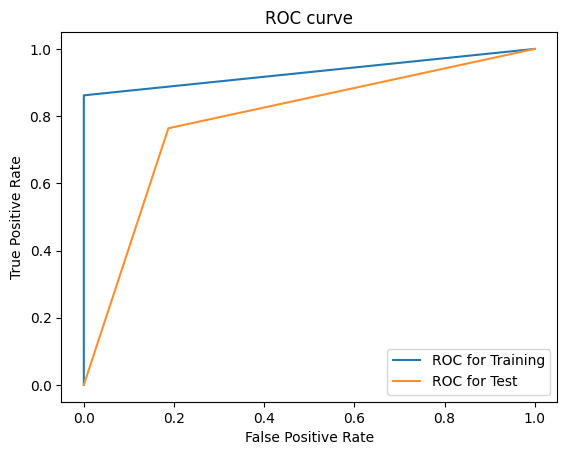

time: 1.8 s (started: 2025-05-29 06:41:25 +00:00)


In [9]:
# Build the model using Naive Bayes approach and calculate its metrics

precisions = []
F1 = []
train_error = []
recall = []
AUC = []
accuracy = []

v_train_dense = v_train.toarray()
v_test_dense = v_test.toarray()

clf = GaussianNB().fit(v_train_dense, y_train)
y_pred = clf.predict(v_test_dense)
y_train_pred = clf.predict(v_train_dense)

# Confusion Matrix
cm0 = confusion_matrix(y_train, y_train_pred)
cm = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy.append(accuracy_score(y_train, y_train_pred))
accuracy.append(accuracy_score(y_test, y_pred))

# Precision
precisions.append(precision_score(y_train, y_train_pred))
precisions.append(precision_score(y_test, y_pred))

# Recall
recall.append(recall_score(y_train, y_train_pred))
recall.append(recall_score(y_test, y_pred))

#F1 score
F1.append(f1_score(y_train, y_train_pred))
F1.append(f1_score(y_test, y_pred))

# AUC
AUC.append(roc_auc_score(y_train, y_train_pred))
AUC.append(roc_auc_score(y_test, y_pred))

 # ROC
fpr0, tpr0, thresholds0 = roc_curve(y_train, y_train_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr0, tpr0, '#2178b5', label='ROC for Training')
plt.plot(fpr, tpr, '#ff8f2c', label='ROC for Test')
plt.legend()

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print('Confusion Table for train:')
headings = ['Predicted Positive', 'Predicted Negative']
names = ['Actual Positive', 'Actual Negative']
df = pd.DataFrame(cm0, index=names, columns=headings)
display(df.style.highlight_max(color = 'lightblue', axis = 0))

print(' ')
print(' ')
print(' ')
print(' ')
print('Confusion table for test:')
headings = ['Predicted Positive', 'Predicted Negative']
names = ['Actual Positive', 'Actual Negative']
df = pd.DataFrame(cm, index=names, columns=headings)
display(df.style.highlight_max(color = 'lightblue', axis = 0))

print(' ')
print(' ')
print(' ')
print(' ')
print('Metrics for GaussianNB:')
headings = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
names = ['Train','Test']
numpy_data=np.array([accuracy, precisions, recall, F1, AUC]).T
df = pd.DataFrame(data=numpy_data, index=names, columns=headings)
display(df.style.highlight_max(color = 'lightgreen', axis = 0))
print(' ')
print(' ')
print(' ')
print(' ')

#KNN Classifier

Best number of neigbors is  50
 
 
 
 
Confusion Table for train:


,Predicted Positive,Predicted Negative
Actual Positive,685,90
Actual Negative,81,708


 
 
 
 
Confusion table for test:


,Predicted Positive,Predicted Negative
Actual Positive,159,17
Actual Negative,23,193


 
 
 
 
Metrics for KNN classifier:


,Accuracy,Precision,Recall,F1,AUC
Train,0.890665,0.887218,0.897338,0.892250,0.890605
Test,0.897959,0.919048,0.893519,0.906103,0.898464


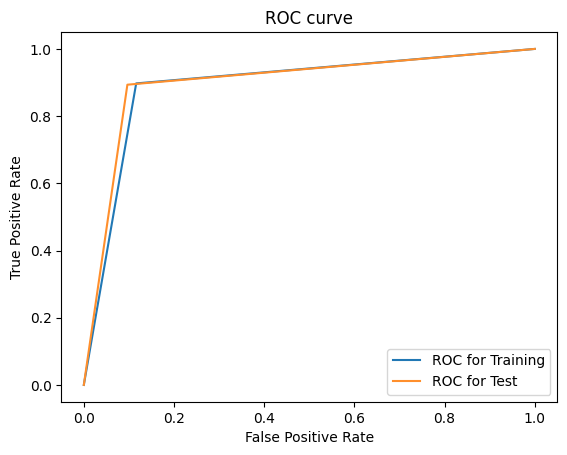

time: 14.4 s (started: 2025-05-29 06:41:27 +00:00)


In [10]:
# Search for the best number of neigbors, build KNN Classifier and test the model

precisions = []
F1 = []
train_error = []
recall = []
AUC = []
accuracy = []

best_score = 0
best_neigbors = 0

for x in range(3, 100):
  knn = KNeighborsClassifier(n_neighbors=x)
  knn.fit(v_train, y_train)
  y_train_pred = knn.predict(v_train)
  score = accuracy_score(y_train, y_train_pred)

  if score > best_score:
    best_score = score
    best_neigbors = x

knn = KNeighborsClassifier(n_neighbors=best_neigbors)

knn.fit(v_train, y_train)


y_train_pred = knn.predict(v_train)


y_pred = knn.predict(v_test)

# Confusion Matrix
cm0 = confusion_matrix(y_train, y_train_pred)
cm = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy.append(accuracy_score(y_train, y_train_pred))
accuracy.append(accuracy_score(y_test, y_pred))

# Precision
precisions.append(precision_score(y_train, y_train_pred))
precisions.append(precision_score(y_test, y_pred))

# Recall
recall.append(recall_score(y_train, y_train_pred))
recall.append(recall_score(y_test, y_pred))

#F1 score
F1.append(f1_score(y_train, y_train_pred))
F1.append(f1_score(y_test, y_pred))

# AUC
AUC.append(roc_auc_score(y_train, y_train_pred))
AUC.append(roc_auc_score(y_test, y_pred))

 # ROC
fpr0, tpr0, thresholds0 = roc_curve(y_train, y_train_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr0, tpr0, '#2178b5', label='ROC for Training')
plt.plot(fpr, tpr, '#ff8f2c', label='ROC for Test')
plt.legend()

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print('Best number of neigbors is ', best_neigbors)
print(' ')
print(' ')
print(' ')
print(' ')

print('Confusion Table for train:')
headings = ['Predicted Positive', 'Predicted Negative']
names = ['Actual Positive', 'Actual Negative']
df = pd.DataFrame(cm0, index=names, columns=headings)
display(df.style.highlight_max(color = 'lightblue', axis = 0))

print(' ')
print(' ')
print(' ')
print(' ')
print('Confusion table for test:')
headings = ['Predicted Positive', 'Predicted Negative']
names = ['Actual Positive', 'Actual Negative']
df = pd.DataFrame(cm, index=names, columns=headings)
display(df.style.highlight_max(color = 'lightblue', axis = 0))

print(' ')
print(' ')
print(' ')
print(' ')
print('Metrics for KNN classifier:')
headings = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
names = ['Train','Test']
numpy_data=np.array([accuracy, precisions, recall, F1, AUC]).T
df = pd.DataFrame(data=numpy_data, index=names, columns=headings)
display(df.style.highlight_max(color = 'lightgreen', axis = 0))
print(' ')
print(' ')
print(' ')
print(' ')

#MLP Classifier

Confusion Table for train:


,Predicted Positive,Predicted Negative
Actual Positive,775,0
Actual Negative,0,789


 
 
 
 
Confusion table for test:


,Predicted Positive,Predicted Negative
Actual Positive,170,6
Actual Negative,22,194


 
 
 
 
Metrics for MLP classifier:


,Accuracy,Precision,Recall,F1,AUC
Train,1.000000,1.000000,1.000000,1.000000,1.000000
Test,0.928571,0.970000,0.898148,0.932692,0.932029


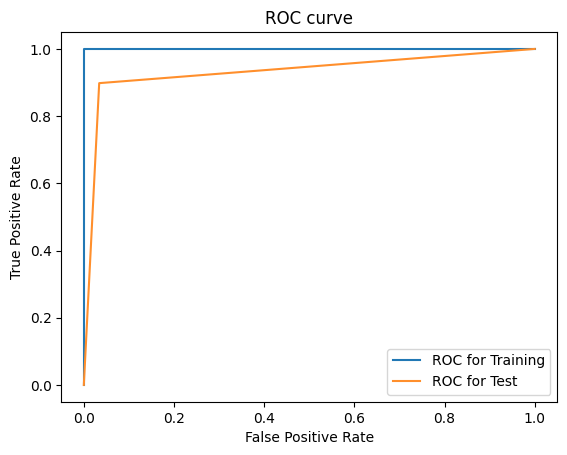

time: 25.8 s (started: 2025-05-29 06:41:42 +00:00)


In [11]:
# Build MLP Classifier with standard number of iterations

precisions = []
F1 = []
train_error = []
recall = []
AUC = []
accuracy = []

mlp = MLPClassifier(hidden_layer_sizes=(220, 30), max_iter=200)

mlp.fit(v_train, y_train)

y_train_pred = mlp.predict(v_train)

y_pred = mlp.predict(v_test)

# Confusion Matrix
cm0 = confusion_matrix(y_train, y_train_pred)
cm = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy.append(accuracy_score(y_train, y_train_pred))
accuracy.append(accuracy_score(y_test, y_pred))

# Precision
precisions.append(precision_score(y_train, y_train_pred))
precisions.append(precision_score(y_test, y_pred))

# Recall
recall.append(recall_score(y_train, y_train_pred))
recall.append(recall_score(y_test, y_pred))

#F1 score
F1.append(f1_score(y_train, y_train_pred))
F1.append(f1_score(y_test, y_pred))

# AUC
AUC.append(roc_auc_score(y_train, y_train_pred))
AUC.append(roc_auc_score(y_test, y_pred))

 # ROC
fpr0, tpr0, thresholds0 = roc_curve(y_train, y_train_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr0, tpr0, '#2178b5', label='ROC for Training')
plt.plot(fpr, tpr, '#ff8f2c', label='ROC for Test')
plt.legend()

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print('Confusion Table for train:')
headings = ['Predicted Positive', 'Predicted Negative']
names = ['Actual Positive', 'Actual Negative']
df = pd.DataFrame(cm0, index=names, columns=headings)
display(df.style.highlight_max(color = 'lightblue', axis = 0))

print(' ')
print(' ')
print(' ')
print(' ')
print('Confusion table for test:')
headings = ['Predicted Positive', 'Predicted Negative']
names = ['Actual Positive', 'Actual Negative']
df = pd.DataFrame(cm, index=names, columns=headings)
display(df.style.highlight_max(color = 'lightblue', axis = 0))

print(' ')
print(' ')
print(' ')
print(' ')
print('Metrics for MLP classifier:')
headings = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
names = ['Train','Test']
numpy_data=np.array([accuracy, precisions, recall, F1, AUC]).T
df = pd.DataFrame(data=numpy_data, index=names, columns=headings)
display(df.style.highlight_max(color = 'lightgreen', axis = 0))
print(' ')
print(' ')
print(' ')
print(' ')


#SVM Classifier

Best C: 7
Best gamma: 0.5
 
 
 
 
Confusion Table for train:


,Predicted Positive,Predicted Negative
Actual Positive,775,0
Actual Negative,0,789


 
 
 
 
Confusion table for test:


,Predicted Positive,Predicted Negative
Actual Positive,173,3
Actual Negative,19,197


 
 
 
 
Metrics for MLP classifier:


,Accuracy,Precision,Recall,F1,AUC
Train,1.000000,1.000000,1.000000,1.000000,1.000000
Test,0.943878,0.985000,0.912037,0.947115,0.947496


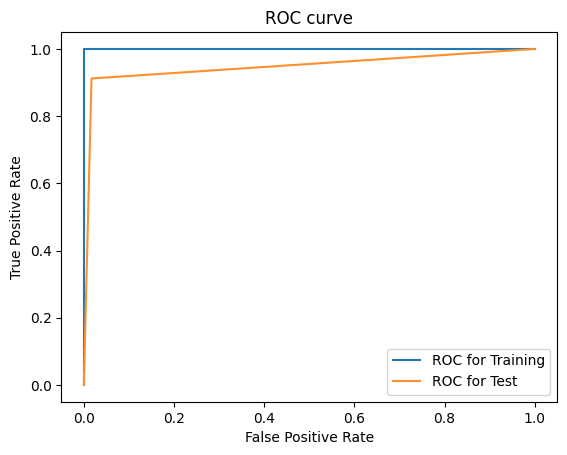

time: 1min 27s (started: 2025-05-29 06:42:07 +00:00)


In [12]:
# Build SVM classifier using Grid Search

precisions = []
F1 = []
train_error = []
recall = []
AUC = []
accuracy = []

# Parameter grid for grid search
param_grid = {
    'C': [0.1, 0.5, 1, 1.5, 3, 5, 7, 10, 12, 20],
    'gamma': [0.1, 0.5, 1, 3, 6, 10, 12]
}


svm = SVC()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(v_train, y_train)


best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']

print("Best C:", best_C)
print("Best gamma:", best_gamma)
print(' ')
print(' ')
print(' ')
print(' ')

svm_best = SVC(C=best_C, gamma=best_gamma)

svm_best.fit(v_train, y_train)

y_train_pred = svm_best.predict(v_train)

y_pred = svm_best.predict(v_test)

# Confusion Matrix
cm0 = confusion_matrix(y_train, y_train_pred)
cm = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy.append(accuracy_score(y_train, y_train_pred))
accuracy.append(accuracy_score(y_test, y_pred))

# Precision
precisions.append(precision_score(y_train, y_train_pred))
precisions.append(precision_score(y_test, y_pred))

# Recall
recall.append(recall_score(y_train, y_train_pred))
recall.append(recall_score(y_test, y_pred))

#F1 score
F1.append(f1_score(y_train, y_train_pred))
F1.append(f1_score(y_test, y_pred))

# AUC
AUC.append(roc_auc_score(y_train, y_train_pred))
AUC.append(roc_auc_score(y_test, y_pred))

 # ROC
fpr0, tpr0, thresholds0 = roc_curve(y_train, y_train_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr0, tpr0, '#2178b5', label='ROC for Training')
plt.plot(fpr, tpr, '#ff8f2c', label='ROC for Test')
plt.legend()

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print('Confusion Table for train:')
headings = ['Predicted Positive', 'Predicted Negative']
names = ['Actual Positive', 'Actual Negative']
df = pd.DataFrame(cm0, index=names, columns=headings)
display(df.style.highlight_max(color = 'lightblue', axis = 0))

print(' ')
print(' ')
print(' ')
print(' ')
print('Confusion table for test:')
headings = ['Predicted Positive', 'Predicted Negative']
names = ['Actual Positive', 'Actual Negative']
df = pd.DataFrame(cm, index=names, columns=headings)
display(df.style.highlight_max(color = 'lightblue', axis = 0))

print(' ')
print(' ')
print(' ')
print(' ')
print('Metrics for MLP classifier:')
headings = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
names = ['Train','Test']
numpy_data=np.array([accuracy, precisions, recall, F1, AUC]).T
df = pd.DataFrame(data=numpy_data, index=names, columns=headings)
display(df.style.highlight_max(color = 'lightgreen', axis = 0))
print(' ')
print(' ')
print(' ')
print(' ')

#Random Forest Classifier

Best n_estimators: 75
Best max_depth: 60
Confusion Table for train:


,Predicted Positive,Predicted Negative
Actual Positive,775,0
Actual Negative,6,783


 
 
 
 
Confusion table for test:


,Predicted Positive,Predicted Negative
Actual Positive,171,5
Actual Negative,17,199


 
 
 
 
Metrics for MLP classifier:


,Accuracy,Precision,Recall,F1,AUC
Train,0.996164,1.000000,0.992395,0.996183,0.996198
Test,0.943878,0.975490,0.921296,0.947619,0.946444


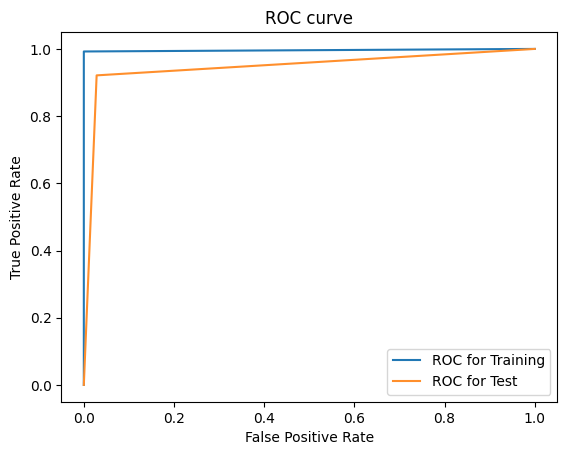

time: 6min 46s (started: 2025-05-29 06:43:35 +00:00)


In [13]:
# Build Random Forest Classifier using params grid to find the best hyper parameters

precisions = []
F1 = []
train_error = []
recall = []
AUC = []
accuracy = []

# Parameter grid for grid search
param_grid = {
    'n_estimators': [5, 10, 15, 20, 30, 50, 75, 100, 150, 175, 180, 190, 200, 300],
    'max_depth': [None, 5, 10, 20, 30, 40, 50, 60]
}

random_forest = RandomForestClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(random_forest, param_grid, cv=5)
grid_search.fit(v_train, y_train)


best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']

print("Best n_estimators:", best_n_estimators)
print("Best max_depth:", best_max_depth)

# Build Random Forest Classifier with the best hyperparameters
random_forest_best = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth)

random_forest_best.fit(v_train, y_train)

y_train_pred = random_forest_best.predict(v_train)

y_pred = random_forest_best.predict(v_test)

# Confusion Matrix
cm0 = confusion_matrix(y_train, y_train_pred)
cm = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy.append(accuracy_score(y_train, y_train_pred))
accuracy.append(accuracy_score(y_test, y_pred))

# Precision
precisions.append(precision_score(y_train, y_train_pred))
precisions.append(precision_score(y_test, y_pred))

# Recall
recall.append(recall_score(y_train, y_train_pred))
recall.append(recall_score(y_test, y_pred))

#F1 score
F1.append(f1_score(y_train, y_train_pred))
F1.append(f1_score(y_test, y_pred))

# AUC
AUC.append(roc_auc_score(y_train, y_train_pred))
AUC.append(roc_auc_score(y_test, y_pred))

 # ROC
fpr0, tpr0, thresholds0 = roc_curve(y_train, y_train_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr0, tpr0, '#2178b5', label='ROC for Training')
plt.plot(fpr, tpr, '#ff8f2c', label='ROC for Test')
plt.legend()

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print('Confusion Table for train:')
headings = ['Predicted Positive', 'Predicted Negative']
names = ['Actual Positive', 'Actual Negative']
df = pd.DataFrame(cm0, index=names, columns=headings)
display(df.style.highlight_max(color = 'lightblue', axis = 0))

print(' ')
print(' ')
print(' ')
print(' ')
print('Confusion table for test:')
headings = ['Predicted Positive', 'Predicted Negative']
names = ['Actual Positive', 'Actual Negative']
df = pd.DataFrame(cm, index=names, columns=headings)
display(df.style.highlight_max(color = 'lightblue', axis = 0))

print(' ')
print(' ')
print(' ')
print(' ')
print('Metrics for MLP classifier:')
headings = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
names = ['Train','Test']
numpy_data=np.array([accuracy, precisions, recall, F1, AUC]).T
df = pd.DataFrame(data=numpy_data, index=names, columns=headings)
display(df.style.highlight_max(color = 'lightgreen', axis = 0))
print(' ')
print(' ')
print(' ')
print(' ')

#Decision Tree Classifier

Confusion Table for train:


,Predicted Positive,Predicted Negative
Actual Positive,775,0
Actual Negative,0,789


 
 
 
 
Confusion table for test:


,Predicted Positive,Predicted Negative
Actual Positive,164,12
Actual Negative,17,199


 
 
 
 
Metrics for MLP classifier:


,Accuracy,Precision,Recall,F1,AUC
Train,1.000000,1.000000,1.000000,1.000000,1.000000
Test,0.926020,0.943128,0.921296,0.932084,0.926557


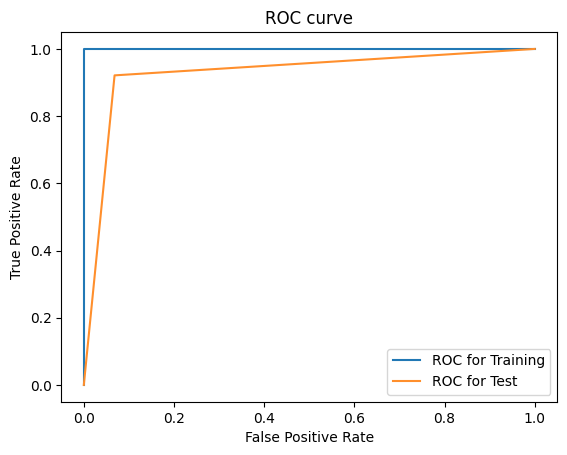

time: 317 ms (started: 2025-05-29 06:50:22 +00:00)


In [14]:
# Build Decision Tree Classifier model

precisions = []
F1 = []
train_error = []
recall = []
AUC = []
accuracy = []

decision_tree = DecisionTreeClassifier()

decision_tree.fit(v_train, y_train)

y_train_pred = decision_tree.predict(v_train)

y_pred = decision_tree.predict(v_test)

# Confusion Matrix
cm0 = confusion_matrix(y_train, y_train_pred)
cm = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy.append(accuracy_score(y_train, y_train_pred))
accuracy.append(accuracy_score(y_test, y_pred))

# Precision
precisions.append(precision_score(y_train, y_train_pred))
precisions.append(precision_score(y_test, y_pred))

# Recall
recall.append(recall_score(y_train, y_train_pred))
recall.append(recall_score(y_test, y_pred))

#F1 score
F1.append(f1_score(y_train, y_train_pred))
F1.append(f1_score(y_test, y_pred))

# AUC
AUC.append(roc_auc_score(y_train, y_train_pred))
AUC.append(roc_auc_score(y_test, y_pred))

 # ROC
fpr0, tpr0, thresholds0 = roc_curve(y_train, y_train_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr0, tpr0, '#2178b5', label='ROC for Training')
plt.plot(fpr, tpr, '#ff8f2c', label='ROC for Test')
plt.legend()

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print('Confusion Table for train:')
headings = ['Predicted Positive', 'Predicted Negative']
names = ['Actual Positive', 'Actual Negative']
df = pd.DataFrame(cm0, index=names, columns=headings)
display(df.style.highlight_max(color = 'lightblue', axis = 0))

print(' ')
print(' ')
print(' ')
print(' ')
print('Confusion table for test:')
headings = ['Predicted Positive', 'Predicted Negative']
names = ['Actual Positive', 'Actual Negative']
df = pd.DataFrame(cm, index=names, columns=headings)
display(df.style.highlight_max(color = 'lightblue', axis = 0))

print(' ')
print(' ')
print(' ')
print(' ')
print('Metrics for MLP classifier:')
headings = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
names = ['Train','Test']
numpy_data=np.array([accuracy, precisions, recall, F1, AUC]).T
df = pd.DataFrame(data=numpy_data, index=names, columns=headings)
display(df.style.highlight_max(color = 'lightgreen', axis = 0))
print(' ')
print(' ')
print(' ')
print(' ')


#Voting Classifier

Confusion Table for train:


,Predicted Positive,Predicted Negative
Actual Positive,775,0
Actual Negative,0,789


 
 
 
 
Confusion table for test:


,Predicted Positive,Predicted Negative
Actual Positive,174,2
Actual Negative,20,196


 
 
 
 
Metrics for MLP classifier:


,Accuracy,Precision,Recall,F1,AUC
Train,1.000000,1.000000,1.000000,1.000000,1.000000
Test,0.943878,0.989899,0.907407,0.946860,0.948022


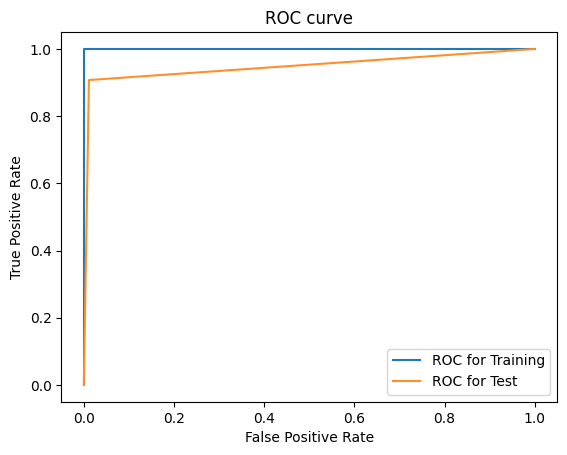

time: 13.4 s (started: 2025-05-29 06:50:22 +00:00)


In [15]:
# Build Voting Classifier of all previous classifier models

precisions = []
F1 = []
train_error = []
recall = []
AUC = []
accuracy = []

# Define individual classifiers
knn_classifier = KNeighborsClassifier()
mlp_classifier = MLPClassifier()
svc_classifier = SVC(probability=True)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# Create a Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('knn', knn_classifier),
        ('mlp', mlp_classifier),
        ('svc', svc_classifier),
        ('decision_tree', decision_tree),
        ('random_forest', random_forest)
    ],
    voting='hard'
)

voting_classifier.fit(v_train, y_train)

y_train_pred = voting_classifier.predict(v_train)

y_pred = voting_classifier.predict(v_test)

# Confusion Matrix
cm0 = confusion_matrix(y_train, y_train_pred)
cm = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy.append(accuracy_score(y_train, y_train_pred))
accuracy.append(accuracy_score(y_test, y_pred))

# Precision
precisions.append(precision_score(y_train, y_train_pred))
precisions.append(precision_score(y_test, y_pred))

# Recall
recall.append(recall_score(y_train, y_train_pred))
recall.append(recall_score(y_test, y_pred))

#F1 score
F1.append(f1_score(y_train, y_train_pred))
F1.append(f1_score(y_test, y_pred))

# AUC
AUC.append(roc_auc_score(y_train, y_train_pred))
AUC.append(roc_auc_score(y_test, y_pred))

 # ROC
fpr0, tpr0, thresholds0 = roc_curve(y_train, y_train_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr0, tpr0, '#2178b5', label='ROC for Training')
plt.plot(fpr, tpr, '#ff8f2c', label='ROC for Test')
plt.legend()

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print('Confusion Table for train:')
headings = ['Predicted Positive', 'Predicted Negative']
names = ['Actual Positive', 'Actual Negative']
df = pd.DataFrame(cm0, index=names, columns=headings)
display(df.style.highlight_max(color = 'lightblue', axis = 0))

print(' ')
print(' ')
print(' ')
print(' ')
print('Confusion table for test:')
headings = ['Predicted Positive', 'Predicted Negative']
names = ['Actual Positive', 'Actual Negative']
df = pd.DataFrame(cm, index=names, columns=headings)
display(df.style.highlight_max(color = 'lightblue', axis = 0))

print(' ')
print(' ')
print(' ')
print(' ')
print('Metrics for MLP classifier:')
headings = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
names = ['Train','Test']
numpy_data=np.array([accuracy, precisions, recall, F1, AUC]).T
df = pd.DataFrame(data=numpy_data, index=names, columns=headings)
display(df.style.highlight_max(color = 'lightgreen', axis = 0))
print(' ')
print(' ')
print(' ')
print(' ')


#Neural Network

In [16]:
class MyNetwork(nn.Module):
    def __init__(self):
        super(MyNetwork, self).__init__()
        self.linear1 = nn.Linear(4454, 3000)
        self.linear2 = nn.LazyLinear(1000)
        self.linear3 = nn.LazyLinear(100)
        self.linear4 = nn.LazyLinear(2)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = self.linear4(x)
        return x

time: 1.97 ms (started: 2025-05-29 06:50:35 +00:00)


In [17]:
model = MyNetwork()

time: 313 ms (started: 2025-05-29 06:50:35 +00:00)


In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters() , lr=0.01)

time: 7.95 s (started: 2025-05-29 06:50:36 +00:00)


In [19]:
x_train = Variable(torch.from_numpy(v_train.toarray())).float()
y_train = Variable(torch.from_numpy(np.array(y_train))).long()

time: 167 ms (started: 2025-05-29 06:50:44 +00:00)


In [20]:
epochs = 10
model.train()
loss_values = []
res_values = []
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x_train)
    res_values.append(y_pred)
    loss = criterion(y_pred, y_train)
    loss_values.append(loss.item())
    pred = torch.max(y_pred, 1)[1].eq(y_train).sum()
    acc = pred * 100.0 / len(x_train)
    print('Epoch: {}, Loss: {}, Accuracy: {}%'.format(epoch+1, loss.item(), acc.numpy()))
    loss.backward()
    optimizer.step()

Epoch: 1, Loss: 0.6954845190048218, Accuracy: 49.55242919921875%
Epoch: 2, Loss: 0.581166684627533, Accuracy: 50.44757080078125%
Epoch: 3, Loss: 0.5466029047966003, Accuracy: 90.08951568603516%
Epoch: 4, Loss: 0.1392994374036789, Accuracy: 98.59335327148438%
Epoch: 5, Loss: 0.026614628732204437, Accuracy: 99.23273468017578%
Epoch: 6, Loss: 0.016005443409085274, Accuracy: 99.48848724365234%
Epoch: 7, Loss: 0.003042688127607107, Accuracy: 99.87212371826172%
Epoch: 8, Loss: 4.399109457153827e-05, Accuracy: 100.0%
Epoch: 9, Loss: 5.996050822432153e-05, Accuracy: 100.0%
Epoch: 10, Loss: 3.305752034066245e-05, Accuracy: 100.0%
time: 30.1 s (started: 2025-05-29 06:50:44 +00:00)


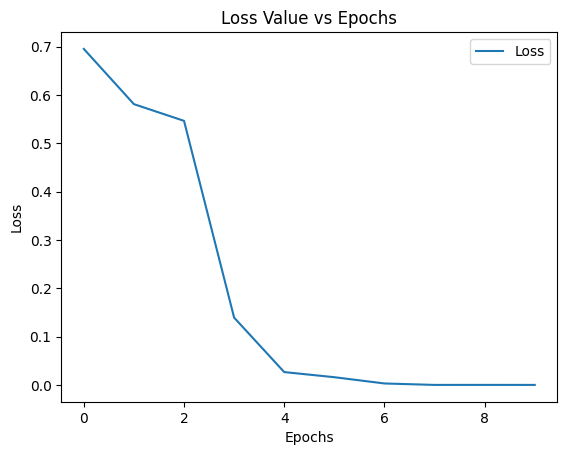

time: 141 ms (started: 2025-05-29 06:51:14 +00:00)


In [21]:
plt.plot(loss_values)
plt.title('Loss Value vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss'])
plt.show()

In [22]:
x_test = Variable(torch.from_numpy(v_test.toarray())).float()
y_test = Variable(torch.from_numpy(np.array(y_test))).long()

time: 5.98 ms (started: 2025-05-29 06:51:14 +00:00)


In [23]:
model.eval()
y_pred_test = []
with torch.no_grad():
    y_pred = model(x_test)
    y_pred_test.append(y_pred)
    loss = criterion(y_pred, y_test)
    pred = torch.max(y_pred, 1)[1].eq(y_test).sum()
    print ("Accuracy : {}%".format(100*pred/len(x_test)))

Accuracy : 90.81632995605469%
time: 225 ms (started: 2025-05-29 06:51:14 +00:00)


#Logistic Regression on newly parsed data

In [35]:
# Upload new data parsed from YouTube
real_data = pd.read_excel('data.xlsx')

time: 47 ms (started: 2025-05-29 07:37:17 +00:00)


In [36]:
real_data

,comment,label
0,This song definitely deserved a Grammy…;0,0
1,She won grammys in our heart !:);,0
2,In my head and heart she's the true winner;,0
3,Grammys don’t deserve you but you’re the true ...,0
4,they put sm effort into not only this performance,0
...,...,...
445,guys please susbribe for my blog at twitter.com,1
446,I just bought cheap tickets here at this website,1
447,buy new iphone for free at www.free.com,1
448,news on the world at www.world.com,1


time: 14.2 ms (started: 2025-05-29 07:37:19 +00:00)


In [37]:
# Shuffle the data to mix positive and negative comments
real_data = real_data.sample(frac = 1)

time: 1.82 ms (started: 2025-05-29 07:37:21 +00:00)


In [38]:
real_data

,comment,label
262,I hate YouTube for notifying me this late;,0
159,This song is so beautiful. Feels like sunshine...,0
265,she literally feelin it. Close her eyes and si...,0
168,Billie has one of the most beautiful faces in ...,0
347,Birds of a feather is a good song;,0
...,...,...
310,Best Music of the Year ;,0
212,She got robbed,0
163,so beautiful;,0
222,There are literally millions of people who lov...,0


time: 10.7 ms (started: 2025-05-29 07:37:23 +00:00)


In [42]:
X_test_new = real_data['comment']
y_test_new = real_data['label']

time: 459 µs (started: 2025-05-29 07:37:39 +00:00)


In [40]:
v_test_new=vectorizer.transform(X_test_new)
print(v_test_new.shape)
print(v_test_new.toarray())

(450, 4454)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
time: 21.6 ms (started: 2025-05-29 07:37:27 +00:00)


Confusion Table for train:


,Predicted Positive,Predicted Negative
Actual Positive,775,0
Actual Negative,0,789


 
 
 
 
Confusion table for test:


,Predicted Positive,Predicted Negative
Actual Positive,283,117
Actual Negative,8,42


 
 
 
 
Metrics for MLP classifier:


,Accuracy,Precision,Recall,F1,AUC
Train,1.000000,1.000000,1.000000,1.000000,1.000000
Test,0.722222,0.264151,0.840000,0.401914,0.773750


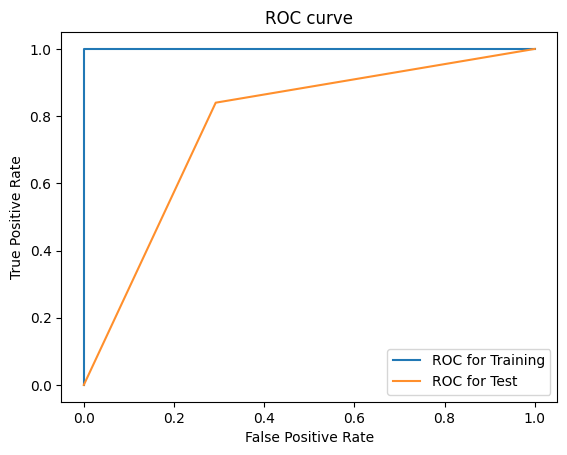

time: 1.16 s (started: 2025-05-29 07:44:35 +00:00)


In [47]:
precisions = []
F1 = []
train_error = []
recall = []
AUC = []
accuracy = []

v_test_dense = v_test_new.toarray()

y_pred = clf.predict(v_test_dense)

# Confusion Matrix
cm0 = confusion_matrix(y_train, y_train_pred)
cm = confusion_matrix(y_test_new, y_pred)

# Accuracy
accuracy.append(accuracy_score(y_train, y_train_pred))
accuracy.append(accuracy_score(y_test_new, y_pred))

# Precision
precisions.append(precision_score(y_train, y_train_pred))
precisions.append(precision_score(y_test_new, y_pred))

# Recall
recall.append(recall_score(y_train, y_train_pred))
recall.append(recall_score(y_test_new, y_pred))

#F1 score
F1.append(f1_score(y_train, y_train_pred))
F1.append(f1_score(y_test_new, y_pred))

# AUC
AUC.append(roc_auc_score(y_train, y_train_pred))
AUC.append(roc_auc_score(y_test_new, y_pred))

 # ROC
fpr0, tpr0, thresholds0 = roc_curve(y_train, y_train_pred)
fpr, tpr, thresholds = roc_curve(y_test_new, y_pred)
plt.plot(fpr0, tpr0, '#2178b5', label='ROC for Training')
plt.plot(fpr, tpr, '#ff8f2c', label='ROC for Test')
plt.legend()

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print('Confusion Table for train:')
headings = ['Predicted Positive', 'Predicted Negative']
names = ['Actual Positive', 'Actual Negative']
df = pd.DataFrame(cm0, index=names, columns=headings)
display(df.style.highlight_max(color = 'lightblue', axis = 0))

print(' ')
print(' ')
print(' ')
print(' ')
print('Confusion table for test:')
headings = ['Predicted Positive', 'Predicted Negative']
names = ['Actual Positive', 'Actual Negative']
df = pd.DataFrame(cm, index=names, columns=headings)
display(df.style.highlight_max(color = 'lightblue', axis = 0))

print(' ')
print(' ')
print(' ')
print(' ')
print('Metrics for MLP classifier:')
headings = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
names = ['Train','Test']
numpy_data=np.array([accuracy, precisions, recall, F1, AUC]).T
df = pd.DataFrame(data=numpy_data, index=names, columns=headings)
display(df.style.highlight_max(color = 'lightgreen', axis = 0))
print(' ')
print(' ')
print(' ')
print(' ')